In [17]:
import pandas as pd
from pandasql import sqldf

# reading jsonl file to dataframe
df_jsonl = pd.read_json('./data/Jobs_NYC_Postings.jsonl', orient='records', lines=True)
pd.get_option("display.max_columns")
pd.get_option("display.max_colwidth")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 100)

df_jsonl[0:1]

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Classification,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,Career Level,Salary Range From,Salary Range To,Salary Frequency,Work Location,Division/Work Unit,Job Description,Minimum Qual Requirements,Preferred Skills,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,606346,DEPARTMENT FOR THE AGING,External,1,Business Operations Analyst,ASSOCIATE STAFF ANALYST,Competitive-1,12627,00,"Administration & Human Resources Technology, Data & Innovation Policy, Research & Analysis",F,Experienced (non-manager),70611.0,81203.0,Annual,"2 Lafayette St., N.Y.",Human Resources,The Office of Human Resources (OHR) seeks a highly motivated individual to serve as a Business O...,"1. A masterâs degree from an accredited college or university, accredited by regional, nationa...",â¢ Project management experience and expertise is a plus. â¢ Self-starter; works independently...,0,Please be sure to submit a resume & cover letter when applying. All current City Employees may a...,0,0,0,"New York City residency is generally required within 90 days of appointment. However, City Emplo...",09/28/2023,27-DEC-2023,09/29/2023,11/20/2023


In [14]:
# query1 = """
# select distinct "Full-Time/Part-Time indicator" as FullTimePartTimeIndicator, count(*) as Count
# from df_jsonl
# group by "Full-Time/Part-Time indicator";
# """
query1 = """
select "# Of Positions" as NumberOfPositions, "Salary Range From" as SalaryRangeFrom, "Salary Range To" as SalaryRangeTo
from df_jsonl
"""
result1 = sqldf(query1, locals())
result1

,NumberOfPositions,SalaryRangeFrom,SalaryRangeTo
0,1,70611.0,81203.0
1,1,72038.0,192152.0
2,1,65604.0,83399.0
3,2,60793.0,69912.0
4,1,39763.0,64420.0
...,...,...,...
6181,1,48612.0,76735.0
6182,1,92301.0,106146.0
6183,1,82506.0,94882.0
6184,1,70611.0,83109.0


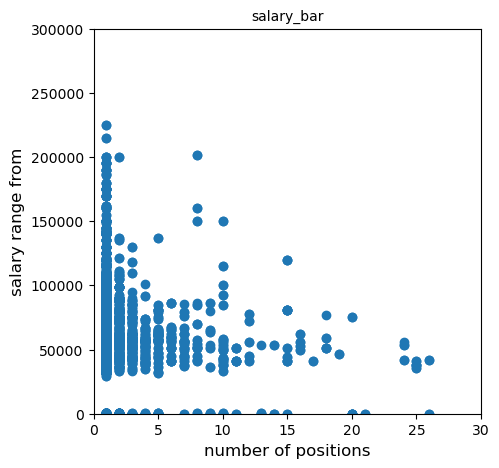

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 5, 5 # Graph Size (width, height)
plt.tight_layout() # Function to prevent graphs from overlapping each other

plt.xlabel("number of positions", fontsize=12) # x-axis label
plt.ylabel("salary range from", fontsize=12) # y-axis label
plt.title("salary_bar", fontsize=10)

plt.xlim(0, 30) # x-axis range
plt.ylim(0, 300000) # y-axis range

plt.scatter(result1['NumberOfPositions'], result1['SalaryRangeFrom'])

In [30]:
query2 = """
select "# Of Positions" as NumberOfPositions, sum("Salary Range From") as avg_SalaryRangeFrom
from df_jsonl 
group by "# Of Positions";
"""
result2 = sqldf(query2, locals())
result2

PandaSQLException: (sqlite3.OperationalError) no such table: df_jsonl
[SQL: 
select "# Of Positions" as NumberOfPositions, sum("Salary Range From") as avg_SalaryRangeFrom
from df_jsonl 
group by "# Of Positions";
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
select "# Of Positions" as NumberOfPositions, "Salary Range From" as SalaryRangeFrom, "Salary Range To" as SalaryRangeTo
from df_jsonl

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 5, 5 # Graph Size (width, height)
plt.tight_layout() # Function to prevent graphs from overlapping each other

plt.xlabel("number of positions", fontsize=12) # x-axis label
plt.ylabel("salary range from", fontsize=12) # y-axis label
plt.title("salary_bar", fontsize=10)

plt.xlim(0, 30) # x-axis range
plt.ylim(0, 300000) # y-axis range

plt.scatter(result1['NumberOfPositions'], result1['SalaryRangeFrom'])

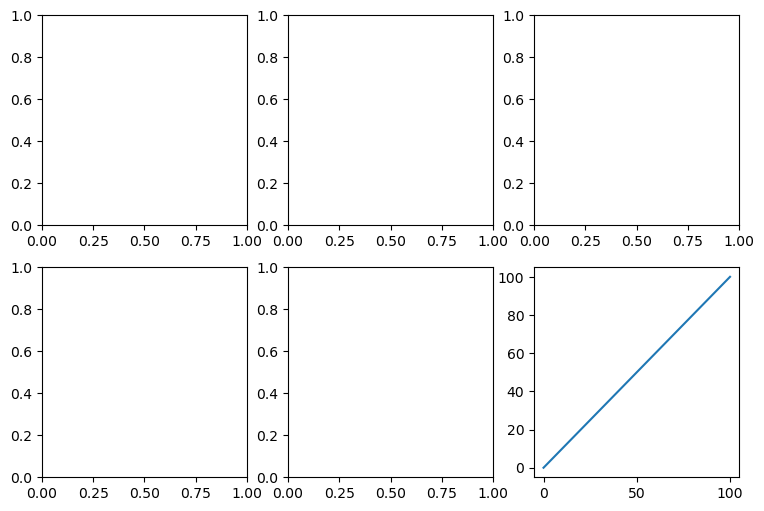

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# figsize is in inches, 1 inch = 2.54 cm, width, height
fig = plt.figure(figsize=(9, 6))

# axesオブジェクトを2行３列に分割して右下にグラフを追加
ax = fig.add_subplot(2, 3, 6)

#  y=xのグラフをaxesオブジェクトに描画
x = np.linspace(0, 100)
y = x
ax.plot(x, y)

# グラフの位置をわかりやすくするため空白部分をサブプロットで埋める
for i in range(6):
    if i != 5:
        fig.add_subplot(2, 3, i+1)
    

plt.show()

